In [1]:
from vpi.io import *
from vpi.binary_morphology import *

Nome: Thais Lima de Sousa nUSP 8941220

# Exercícios Morfologia

<p>
    Utilize as imagens "segmentation-0.png", "segmentation-1.png", "segmentation-2.png", "segmentation-3.png" e "segmentation-4.png" todas nas pasta "./images". Utilizando as operações morfologicas da biblioteca "vpi.binary_morphology" descrita em https://github.com/dennisjosesilva/vpi/wiki nos exercícios abaixo:
</p>

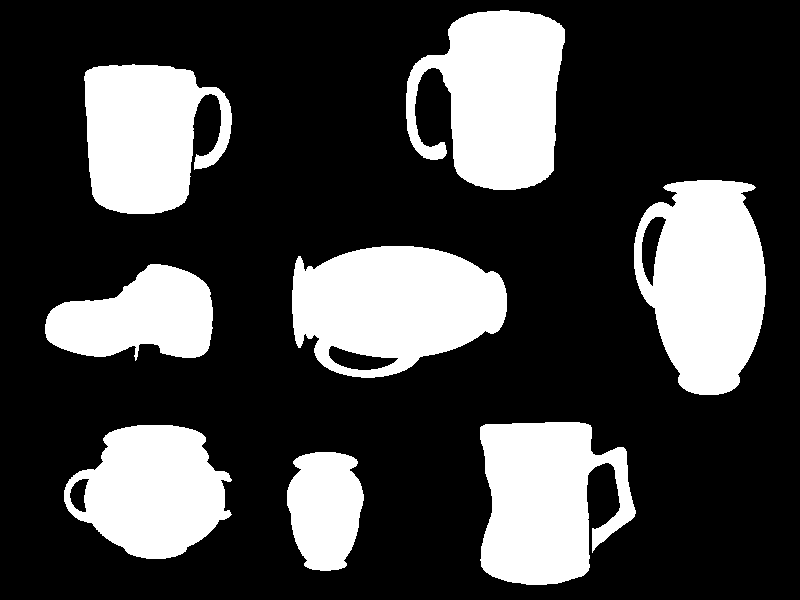

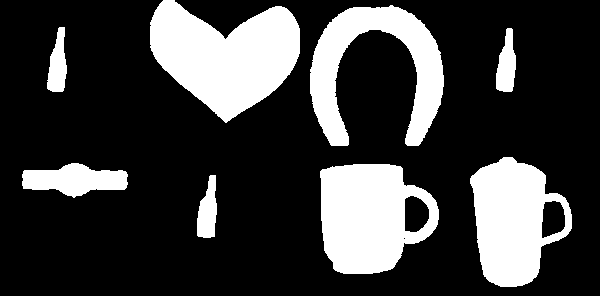

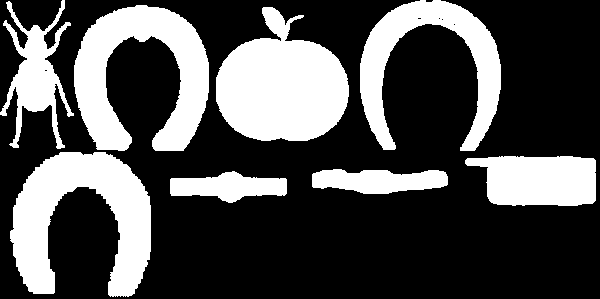

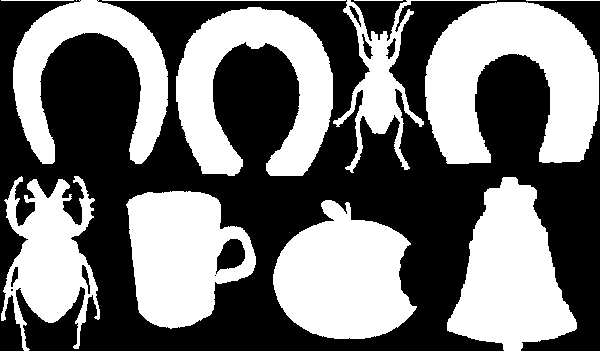

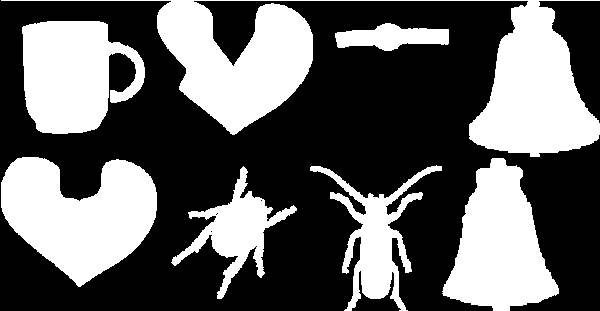

In [2]:
img0 = read_binary_image("images/segmentation-0.png")
img1 = read_binary_image("images/segmentation-1.png")
img2 = read_binary_image("images/segmentation-2.png")
img3 = read_binary_image("images/segmentation-3.png")
img4 = read_binary_image("images/segmentation-4.png")

display_binary_image(img0)
display_binary_image(img1)
display_binary_image(img2)
display_binary_image(img3)
display_binary_image(img4)

images = []
images.append(img0)
images.append(img1)
images.append(img2)
images.append(img3)
images.append(img4)

<p>
    <strong>1.) </strong> Projete um operador morfológico para segmentar objetos com alças. Teste em todas as
    imagens.
</p>

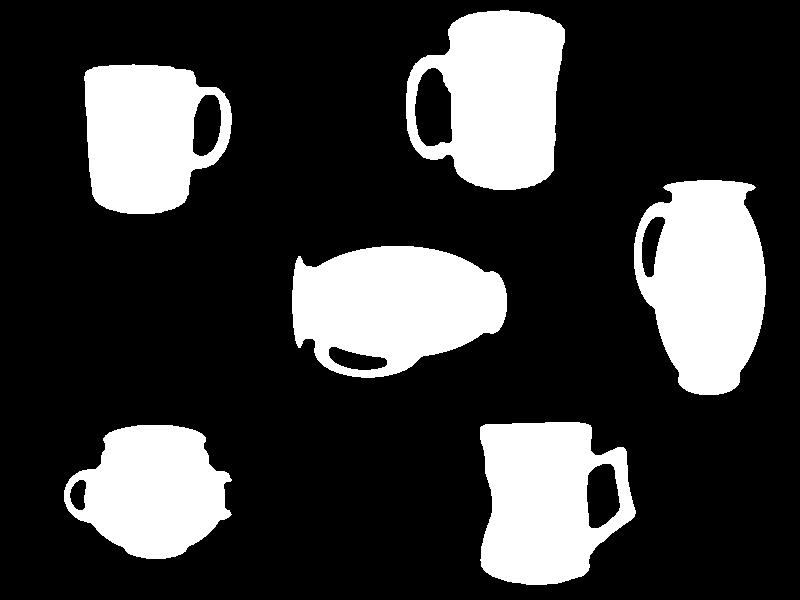

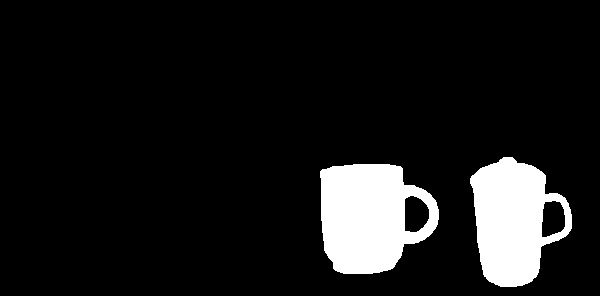

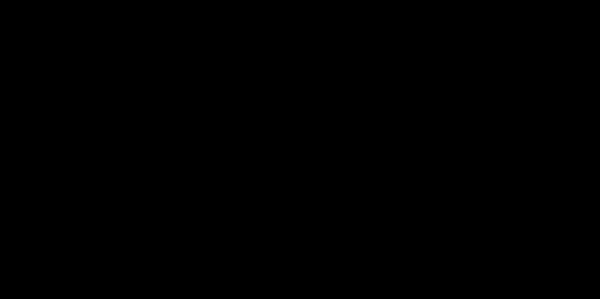

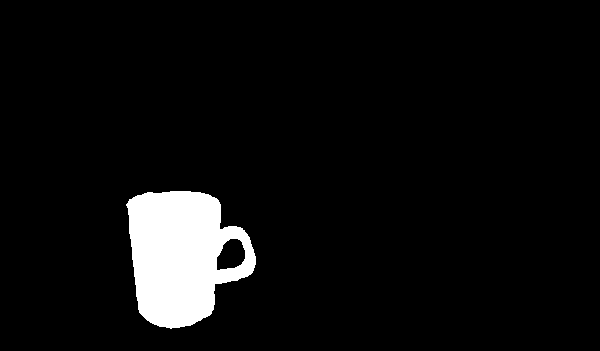

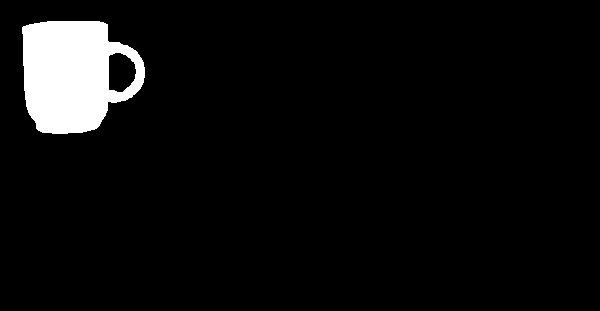

In [6]:
def alca(f, r_clos = 1):
    b = create_structure_element_disk(4)
    # conecta eventuais alças desconectadas
    f = closing(f, create_structure_element_disk(r_clos))
    g = sub_with_saturation(f, closing_holes(f, b))
    # remove detalhes pequenos
    g = opening(g, create_structure_element_disk(3.6))
    # cria marcador a partir da borda dos buracos das alças
    g = morphological_gradient(g, b)
    return inf_reconstruction(g, f, b)

r = 4
for f in images:
    display_binary_image(alca(f, r))
    if np.array_equal(f, img0):
        r = 1

<p>
    <strong> 2.)</strong> Projete um operador morfológico para segmentar besouros. Teste em todas as imagens.
</p>

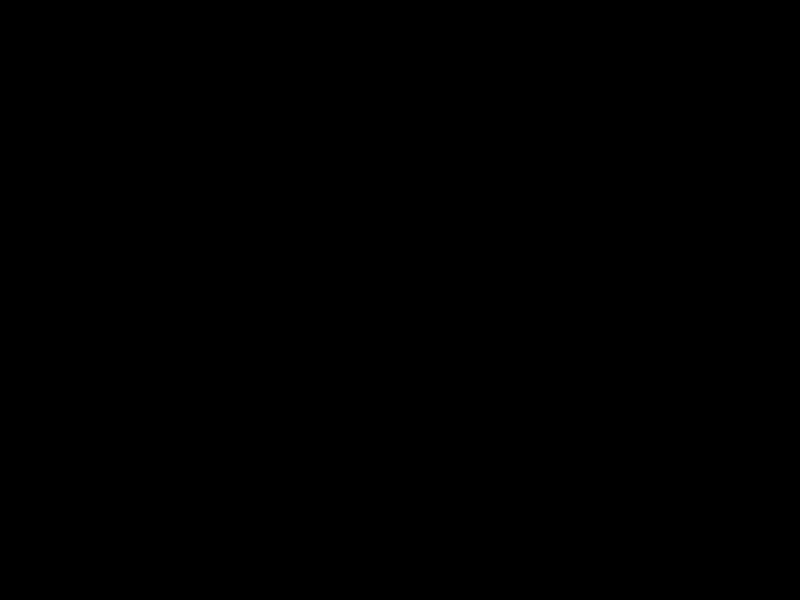

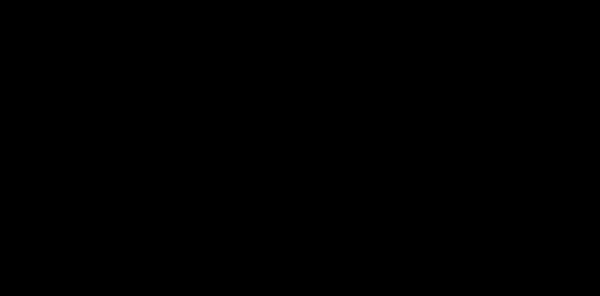

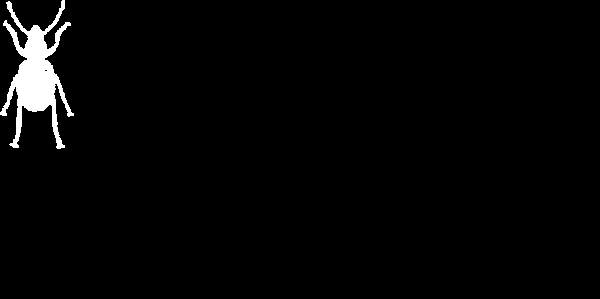

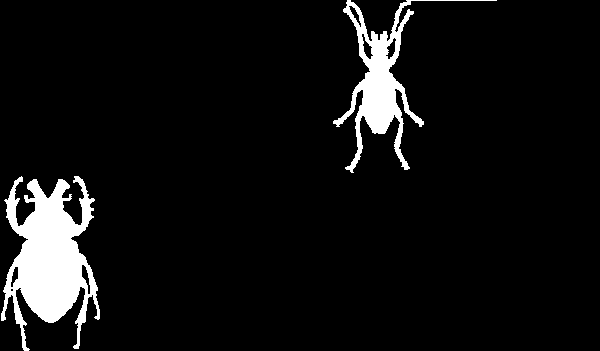

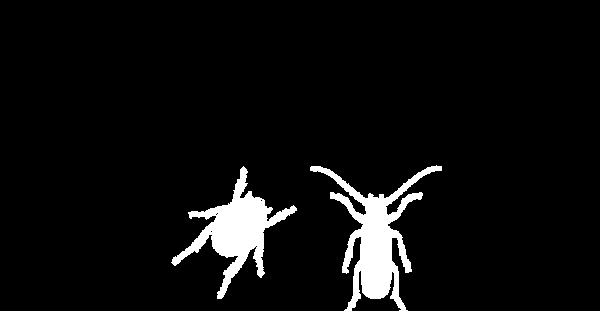

In [4]:
def besouro(f, r_th = 2):
    # encontra segmentos finos dos objetos
    m = opening_top_hat(f, create_structure_element_box(r_th))
    # remove segmentos muito finos provenientes de objetos que não são besouros (obtém patas)
    m = area_opening(m, 100)
    # conecta segmentos que formam as patas
    m = closing(m, create_structure_element_disk(4))
    g = inf_reconstruction(m, f)
    
    return g

r = 2
for f in images:
    display_binary_image(besouro(f, r))
    if np.array_equal(f, img3):
        r = 3
    

<p>
    <strong> 3.) </strong> Projete um operador morfológico para segmentar ferraduras. Teste em todas as imagens
</p>

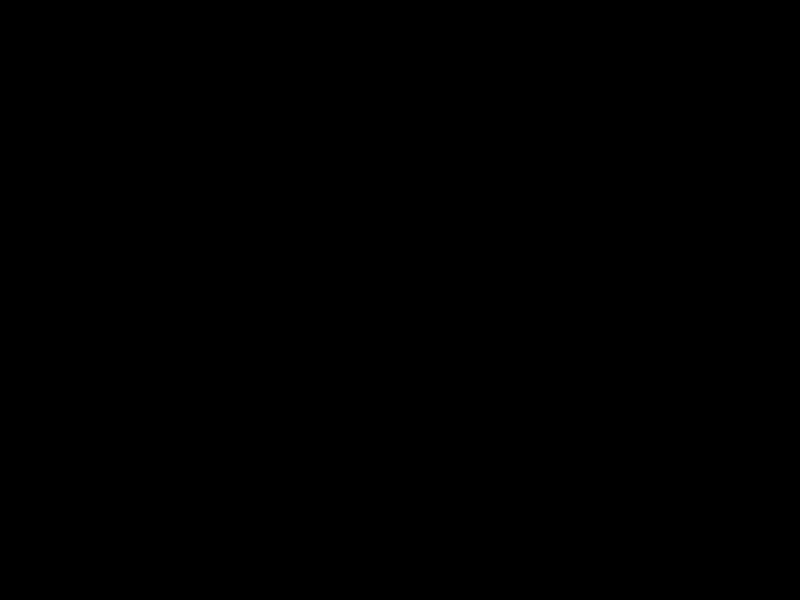

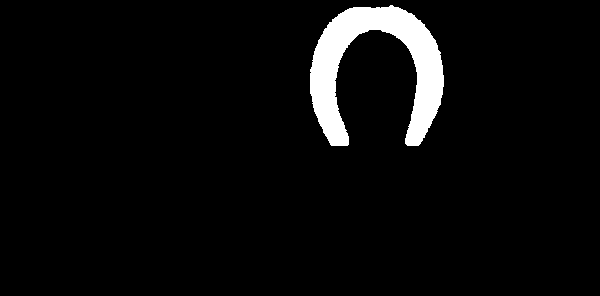

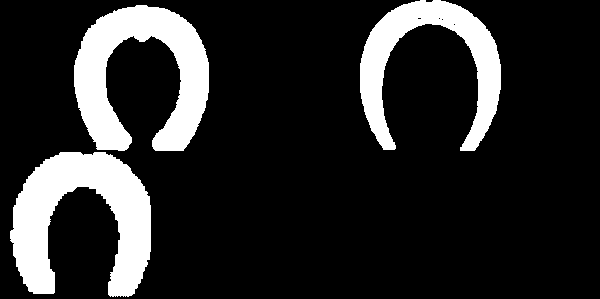

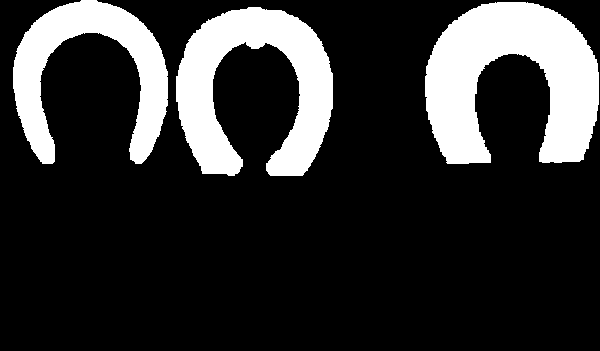

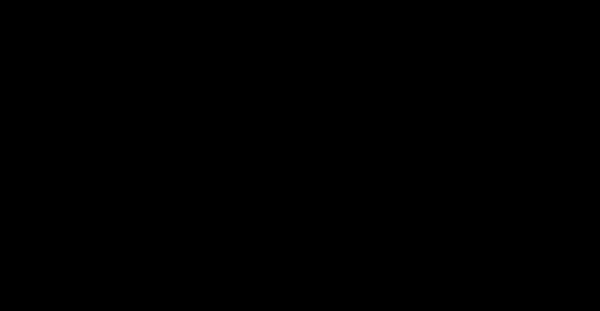

In [5]:
def ferradura(f, r_erosion = 20):
    H = int(f.shape[0] * 4 / 10)
    # cria marcador vertical (H é o comprimento aprox. da ferradura)
    v = np.ones((H, 1))
    m = opening(f, v)
    W = int(f.shape[1] / 6)
    # cria marcador horizontal (largura aprox da ferradura)
    h = np.ones((1, W))
    m2 = opening(f, h)
    g1 = inf_reconstruction(m, f)
    g2 = inf_reconstruction(m2, f)
    # m3 é o marcador para detectar objetos cujos marcadores m2 são grandes
    m3 =  erosion(m2, create_structure_element_box(r_erosion))
    g3 = inf_reconstruction(m3, f)
    # g contém objetos com a largura aprox. da ferradura, mas que não são espessos (remove maçã, por exemplo)
    g = sub_with_saturation(g2, g3)
    # retorna a intersecção das imagens da reconstrução pelos marcadores horizontal e vertical
    return g1 * g
    
r = 20
for f in images:
    display_binary_image(ferradura(f, r))
    if np.array_equal(f, img3):
        r = 10